## Customer Segmentation & Personality Analysis

### Problem Statement

SweetTreats is a grocery retailer with both online presence and physical stores, selling a variety of products from wine to fruits, meat, fish, sweets and gold. It requires all customers to create an account with the retailer, indicating demographic details such as year of birth, education level, marital status, etc. Purchase transactions (both online and physical) by customers are also recorded in their accounts. Occasionally, SweetTreats sends out marketing communications to selected customers, sharing with them new promotional deals that they can enjoy as members of the retailer. 

To improve revenue, SweetTreats aims to address the following issues: 
- Can the customers of the retailer be segmented into groups for more effective targeting through marketing campaigns? 
- What are some key characteristics of each customer segment? 

### Data Dictionary


|      Feature      |   Data Type  |      Category      |                       Description                      |
|:------------------|--------------|--------------------|--------------------------------------------------------|
| **ID** | *integer* | People | Customer's unique identifier |
| **Year_Birth** | *integer* | People | Customer's birth year |
| **Education** | *object* | People | Customer's education level |
| **Marital_Status** | *object* | People | Customer's marital status |
| **Income** | *integer* | People | Customer's yearly household income |
| **Kidhome** | *integer* | People | Number of children in customer's household |
| **Teenhome** | *integer* | People | Number of teenagers in customer's household |
| **Dt_Customer** | *object* | People | Date of customer's enrollment with the company |
| **Recency** | *integer* | People | Number of days since customer's last purchase |
| **Complain** | *integer* | People | 1 if customer complained in the last 2 years, 0 otherwise |
| **MntWines** | *integer* | Products | Amount spent on wine in last 2 years |
| **MntFruits** | *integer* | Products | Amount spent on fruits in last 2 years |
| **MntMeatProducts** | *integer* | Products | Amount spent on meat in last 2 years |
| **MntFishProducts** | *integer* | Products | Amount spent on fish in last 2 years |
| **MntSweetProducts** | *integer* | Products | Amount spent on sweets in last 2 years |
| **MntGoldProds** | *integer* | Products | Amount spent on gold in last 2 years |
| **NumDealsPurchases** | *integer* | Promotion | Number of purchases made with a discount |
| **AcceptedCmp1** | *integer* | Promotion | 1 if customer accepted the offer in the 1st campaign, 0 otherwise |
| **AcceptedCmp2** | *integer* | Promotion | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| **AcceptedCmp3** | *integer* | Promotion | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise |
| **AcceptedCmp4** | *integer* | Promotion | 1 if customer accepted the offer in the 4th campaign, 0 otherwise |
| **AcceptedCmp5** | *integer* | Promotion | 1 if customer accepted the offer in the 5th campaign, 0 otherwise |
| **Response** | *integer* | Promotion | 1 if customer accepted the offer in the last campaign, 0 otherwise |
| **NumWebPurchases** | *integer* | Place | Number of purchases made through the company’s web site |
| **NumCatalogPurchases** | *integer* | Place | Number of purchases made using a catalogue |
| **NumStorePurchases** | *integer* | Place | Number of purchases made directly in stores |
| **NumWebVisitsMonth** | *integer* | Place | Number of visits to company’s web site in the last month |
| **Z_CostContact** | *integer* | - | Cost of acquiring/contacting the customer |
| **Z_Revenue** | *integer* | - | Revenue earned from the customer's purchases |

### 1. Introduction

Let's first import the relevant packages and dataset. 

In [1]:
# import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt 

from datetime import date 
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
# import dataset
customer_df = pd.read_csv('../datasets/marketing_campaign.csv', sep='\t')

# view the top 5 rows
customer_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### 2. Exploratory Data Analysis

In this section, let's look into the dataset and understand some of the key trends.

In [3]:
# create a function to obtain the shape, no. of missing and duplicated values, and datatypes
def data_summary(df):

    # view the shape of the dataframe
    print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the DataFrame.')
    print()
    
    # check for duplicated rows
    print(f'There are {df[df.duplicated(keep=False)].shape[0]} duplicated rows.')
    print()
    
    # check for missing values
    print('Number of missing values:')
    print(df.isnull().sum())
    print()
    
    # view the datatypes
    print('Data types of columns:')
    print(df.info())
    
# view the summary
data_summary(customer_df)

There are 2240 rows and 29 columns in the DataFrame.

There are 0 duplicated rows.

Number of missing values:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Data types of columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 co

From the above output, we can observe that: 
- The dataset does not contain any duplicated rows.
- Only the feature `Income` has missing values – 24 rows.
- `Dt_Customer` which refers to the date of customer's enrollment into the company is not in the datetime format.
- Some of the features are categorical in nature, i.e. `Education`, `Marital_Status`, etc., thus they will need to be encoded into numerical forms for subseuqent modelling.

Let's look into the feature `Income` to decide whether the rows with null values should be dropped.

In [4]:
# compute proportion of missing values
prop_missing_income = round(customer_df['Income'].isnull().sum() / customer_df.shape[0]*100,2)
print(f'There are {prop_missing_income}% rows missing in the Income columns.')

# show top 5 rows with missing values
customer_df.loc[customer_df['Income'].isnull(),:].head()

There are 1.07% rows missing in the Income columns.


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0


While the number of missing rows in the `Income` column is around 1.07% of the DataFrame (and therefore can be dropped because they are negligible), we will retain the rows as the other column values may be crucial in this analysis. The null values will be imputed with the median value in the `Income` column.

In [5]:
# impute missing values in Income with median value
customer_df['Income'] = customer_df['Income'].fillna((customer_df['Income'].median()))

# obtain a numerical summary
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


From the above output, we can observe that: 
- The median `Year_Birth` is 1970 – this however may not be informative; we can consider deriving the age of the customer.
- The median `Income` is 55,247 dollars, while the maximum value reaches 666,666 dollars.
- Most customers have none, if not at most two children.
- The maximum number of days since the customer's last purchase is 99 days – slightly above 3 months; in comparison to a 6-month time horizon, the customers seem to be relatively active in their purchase activities.  
- The amount spent on the items can be summed together and identified as a new feature – `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts` and `MntGoldProds`.
- Comparing the mode of purchases, store purchases has the highest median value (`NumStorePurchases`, 5). 
    - However, the highest number of purchases made is via the catalogue (`NumCatalogPurchases`, 28).
- When viewing the number of acceptance for the offers via marketing campaigns, it seems that most customers have not accepted the offers, i.e. '0' is showing in the 75th percentile for all five campaigns.

Let's look into the categorical features. 

In [6]:
# view the proportion for categorical features
cat_features = ['Education', 'Marital_Status']
for i in cat_features:
    print(f'The `{i}` feature contains:')
    print(customer_df[i].value_counts(normalize=True))
    print()

The `Education` feature contains:
Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64

The `Marital_Status` feature contains:
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64



It is interesting to note that there are some unconventional values, such as '2n Cycle' in the `Education` feature, and 'Absurd' and 'YOLO' in the `Marital_Status` feature. 

### 3. Creating new features

In this section, let's create new features based on the observations gained from the numerical summary above, such as `age`, `total_kids`, `total_spent` and `total_purchases`.

In [7]:
# create a new feature for customer's age
customer_df['age_years'] = date.today().year - customer_df['Year_Birth']

# create a new feature for total number of children
customer_df['total_kids'] = customer_df['Kidhome'] + customer_df['Teenhome']

# create a new feature for total amount spent
customer_df['total_amt_spent'] = (customer_df['MntWines'] + customer_df['MntFruits'] + customer_df['MntMeatProducts'] 
                                  + customer_df['MntFishProducts'] + customer_df['MntSweetProducts'] + customer_df['MntGoldProds'])

# create a new feature for total number of purchases
customer_df['total_num_purchases'] = (customer_df['NumDealsPurchases'] + customer_df['NumWebPurchases'] 
                                      + customer_df['NumCatalogPurchases'] + customer_df['NumStorePurchases'])

In [8]:
# convert 'Dt_Customer' into datetime format
customer_df['Dt_Customer'] = pd.to_datetime(customer_df['Dt_Customer'])

In [9]:
# create a list to store the customer's enrollment dates with the company
enrol_dates = []
for i in customer_df['Dt_Customer']:
    i = i.date()
    enrol_dates.append(i)
    
# obtain the oldest and latest customer's enrolment date with the company 
print(f"The most recent customer's enrolment date is {max(enrol_dates)}.")
print(f"The earliest customer's enrolment date is {min(enrol_dates)}.")

The most recent customer's enrolment date is 2014-12-06.
The earliest customer's enrolment date is 2012-01-08.


In [10]:
# create a new feature for tracking end date 
# assume end date of 28 Feb 2022
customer_df['tracking_end_date'] = date(2022, 2, 28)
customer_df['tracking_end_date'] = pd.to_datetime(customer_df['tracking_end_date'])

# create a new feature for customer's tenure in the company (in days)
customer_df['tenure_in_days'] = (customer_df['tracking_end_date'] - customer_df['Dt_Customer']).dt.days

In [11]:
# view the top 5 rows 
customer_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age_years,total_kids,total_amt_spent,total_num_purchases,tracking_end_date,tenure_in_days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,0,1617,25,2022-02-28,3612
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,2,27,6,2022-02-28,2766
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,0,776,21,2022-02-28,3113
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38,1,53,8,2022-02-28,2706
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41,1,422,19,2022-02-28,2962


### 4. Further EDA

In this section, let's view a summary of the breakdown for the categorical variables.

This includes `Education` and `Marital_Status`.

[Text(0.5, 0, 'Marital Status'), Text(0, 0.5, 'Number of customers')]

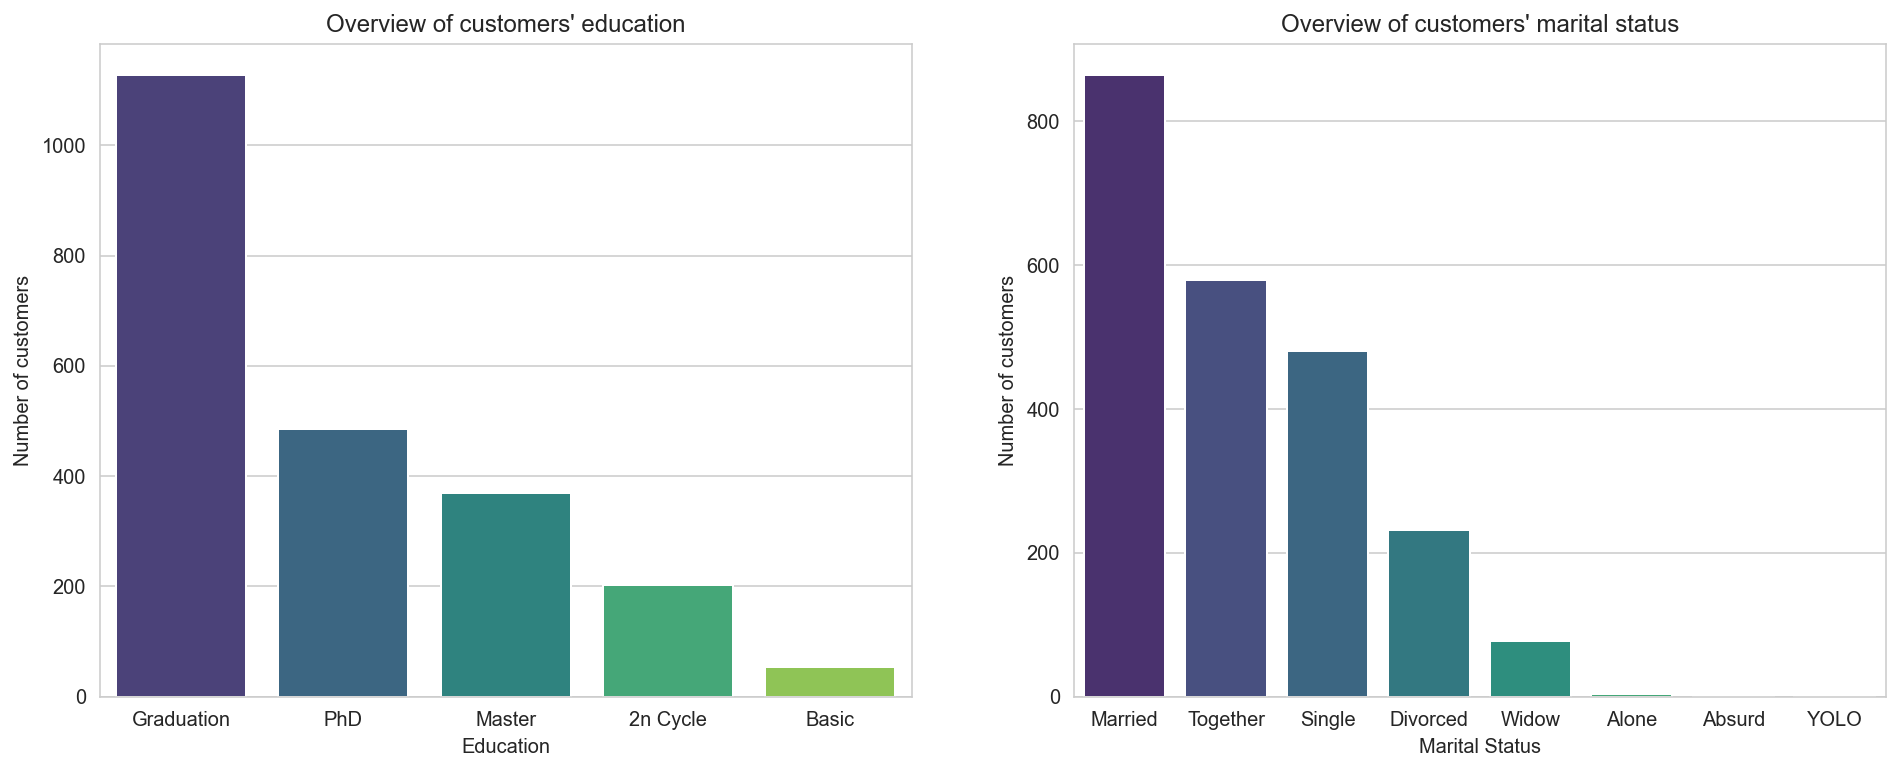

In [12]:
# create subplots to view Education and Marital Status
plt.figure(figsize=(16,6))
ax1 = plt.subplot(1,2,1)
ax1.set_title("Overview of customers' education")
ax1 = sns.countplot(x='Education', 
                    data=customer_df, 
                    palette='viridis', 
                    order=customer_df['Education'].value_counts().index)
ax1.set(xlabel='Education', ylabel='Number of customers')

ax2 = plt.subplot(1,2,2)
ax2.set_title("Overview of customers' marital status")
ax2 = sns.countplot(x='Marital_Status', 
                    data=customer_df, 
                    palette='viridis', 
                    order=customer_df['Marital_Status'].value_counts().index)
ax2.set(xlabel='Marital Status', ylabel='Number of customers')

For `Education`, it seems that most customers have gone through higher education such as university Bachelor's Degree ('Graduation'); as for `Marital_Status`, it seems that some values can be combined together, such as 'Married' and 'Together' in a group.

Let's look at the number of children in the family, `Kidhome` and `Teenhome`.

[Text(0.5, 0, 'Total number of kids'), Text(0, 0.5, 'Number of customers')]

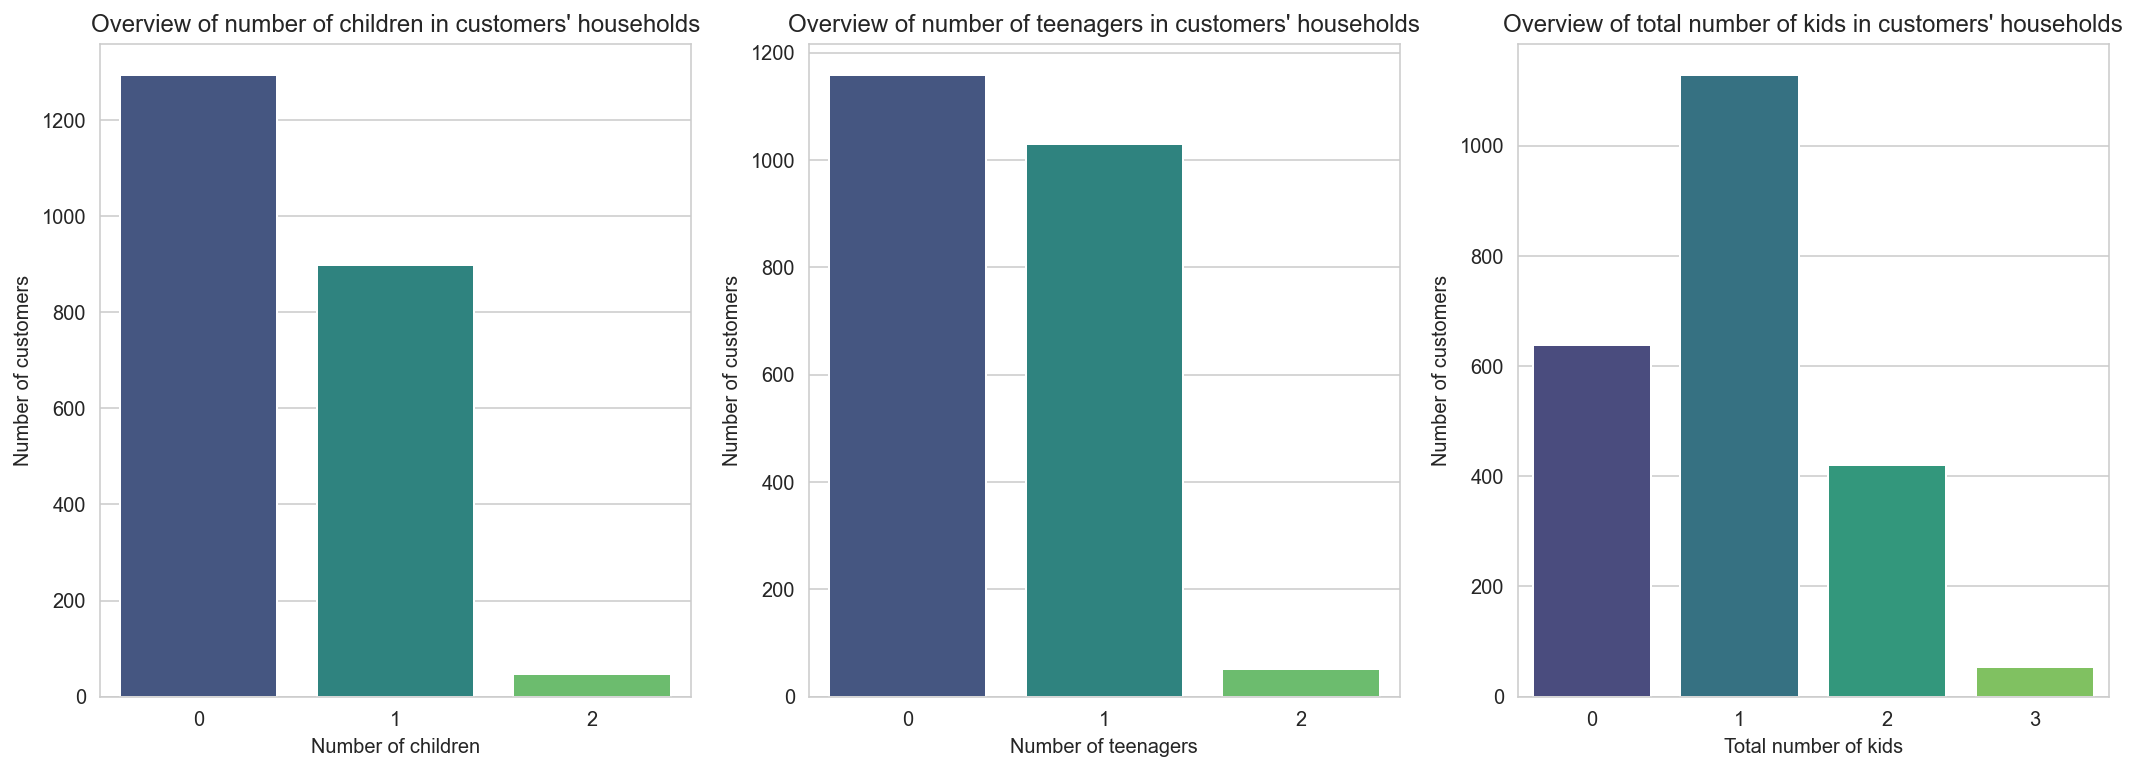

In [13]:
# create subplots for both Kidhome and Teenhome
plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,3,1)
ax1.set_title("Overview of number of children in customers' households")
ax1 = sns.countplot(x='Kidhome', data=customer_df, palette='viridis')
ax1.set(xlabel='Number of children', ylabel='Number of customers')

ax2 = plt.subplot(1,3,2)
ax2.set_title("Overview of number of teenagers in customers' households")
ax2 = sns.countplot(x='Teenhome', data=customer_df, palette='viridis')
ax2.set(xlabel='Number of teenagers', ylabel='Number of customers')

ax3 = plt.subplot(1,3,3)
ax3.set_title("Overview of total number of kids in customers' households")
ax3 = sns.countplot(x='total_kids', data=customer_df, palette='viridis')
ax3.set(xlabel='Total number of kids', ylabel='Number of customers')

It seems that on average, most families have at least 1 kid in the household, up to a maximum of 3 kids comprising both children and teenagers. 

Let's examine the customers' `age_years` and their `Income` level to ascertain their purchase propensity.

In [14]:
# create a function to plot a histogram and boxplot

def plot_charts(column_name, color_choice, xlabel_name, title_name):
    plt.figure(figsize=(16,6))
    
    # plot histogram
    ax1 = plt.subplot(1,2,1)
    ax1.set_title(title_name)
    ax1 = sns.distplot(customer_df[column_name], color=color_choice)
    ax1.set(xlabel=xlabel_name, ylabel='Number of customers')
    
    # plot boxplot
    ax2 = plt.subplot(1,2,2)
    ax2.set_title(title_name)
    ax2 = sns.boxplot(customer_df[column_name], color=color_choice)
    ax2.set(xlabel=xlabel_name, ylabel='Number of customers')

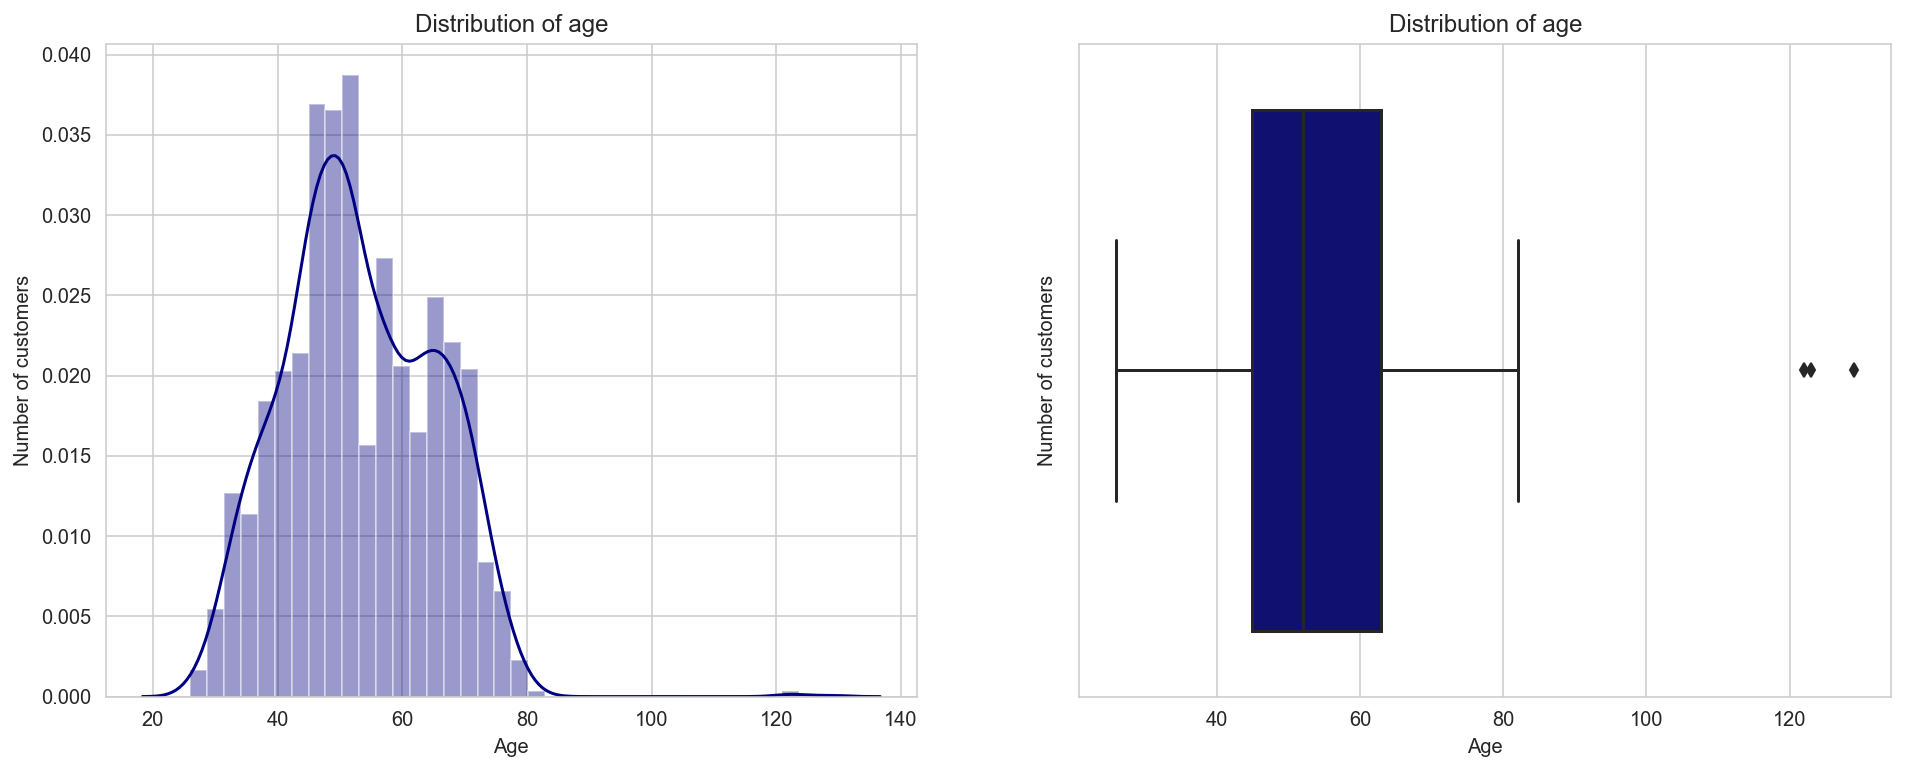

In [16]:
# create visualization for age
plot_charts('age_years', 'navy', 'Age', 'Distribution of age')

From the plot of the `age` above, the data seems to be normally distributed with one additional slight peak; there are some outliers in which customers are above 120 years old in 2021.

In [17]:
# view outliers for age
customer_df[customer_df['age_years']>90].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age_years,total_kids,total_amt_spent,total_num_purchases,tracking_end_date,tenure_in_days
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,122,1,65,6,2022-02-28,3077
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,129,1,22,4,2022-02-28,2844
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,123,0,1853,15,2022-02-28,3077


While there's a lower likelihood of customers being over 120 years old in 2022, because the values in the other columns may be crucial, we will retain the rows and impute the outliers with the median age.

In [18]:
# impute outliers with median age
customer_df['age_years'] = customer_df['age_years'].mask(customer_df['age_years']>90, np.median(customer_df['age_years']))

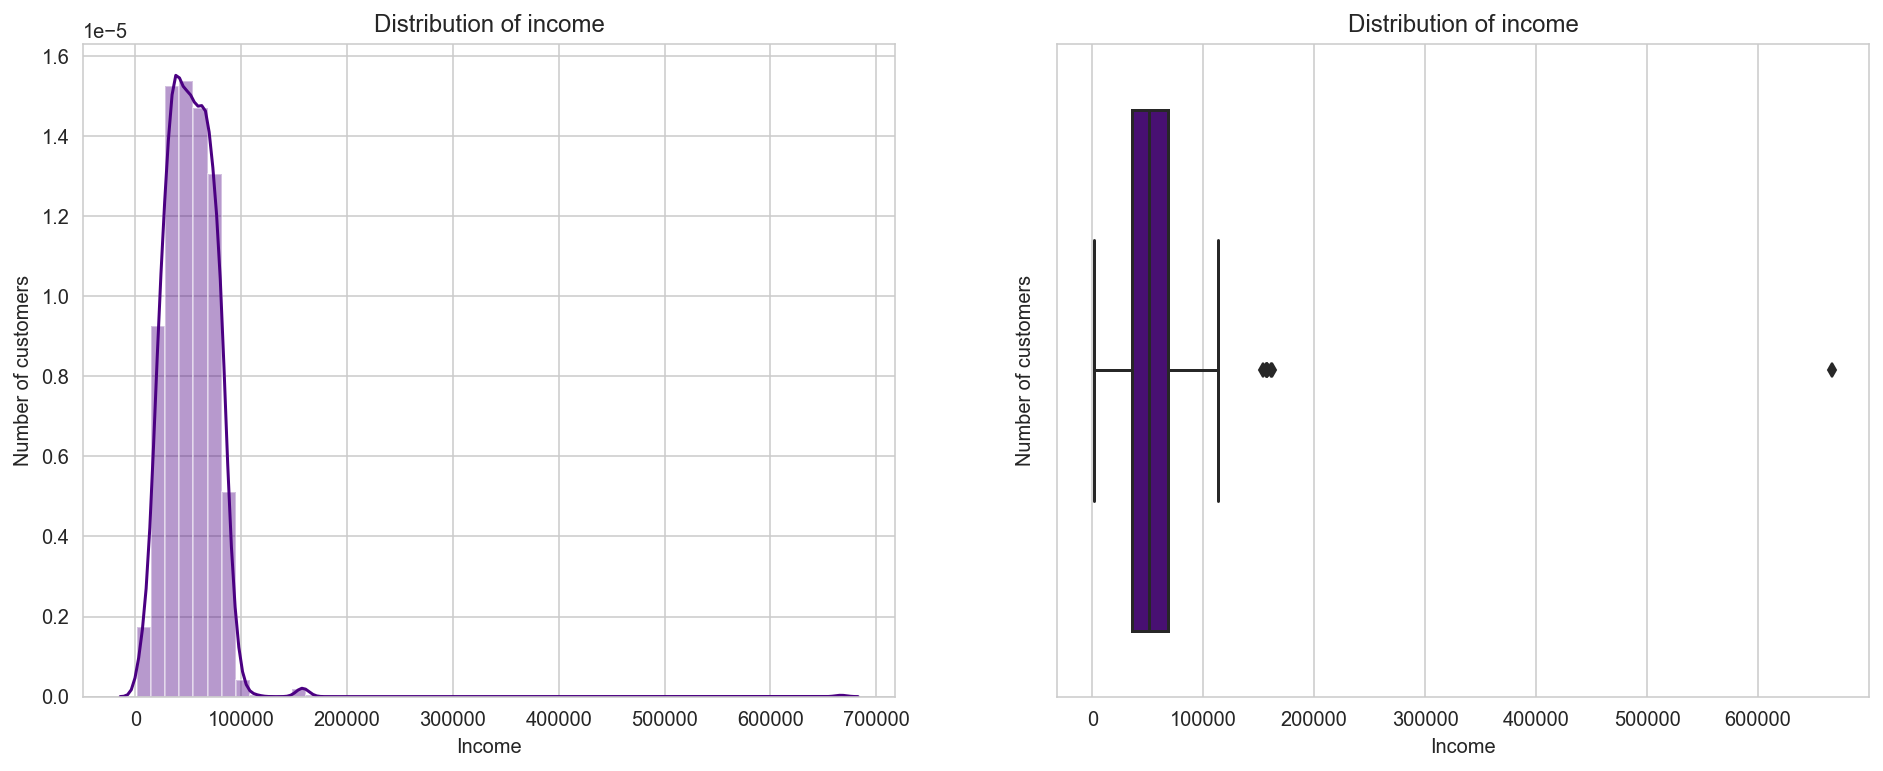

In [19]:
# create visualization for Income
plot_charts('Income', 'indigo', 'Income', 'Distribution of income')

From the plot of the `Income` above, the distribution seems to be right-skewed, with outliers featuring customers who have income above 100,000 dollars and up till 666,666 dollars.

In [20]:
# view outliers for Income
customer_df[customer_df['Income']>135000].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age_years,total_kids,total_amt_spent,total_num_purchases,tracking_end_date,tenure_in_days
164,8475,1973,PhD,Married,157243.0,0,1,2014-01-03,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0,49.0,1,1608,37,2022-02-28,2978
617,1503,1976,PhD,Together,162397.0,1,1,2013-03-06,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0,46.0,2,107,1,2022-02-28,3281
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-07-02,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0,47.0,0,6,0,2022-02-28,2798
687,1501,1982,PhD,Married,160803.0,0,0,2012-04-08,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0,40.0,0,1717,44,2022-02-28,3613
1300,5336,1971,Master,Together,157733.0,1,0,2013-04-06,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0,51.0,1,59,2,2022-02-28,3250


While it's likely for customers to have income above 100,000 dollars, to improve the modelling performance, we will replace the outliers with the median income value.

In [21]:
# impute outliers with median income
customer_df['Income'] = customer_df['Income'].mask(customer_df['Income']>135000, np.median(customer_df['Income']))

Let's look at the customers' `tenure_in_days` with the company, and `Recency` to understand customers' interactions with the company.

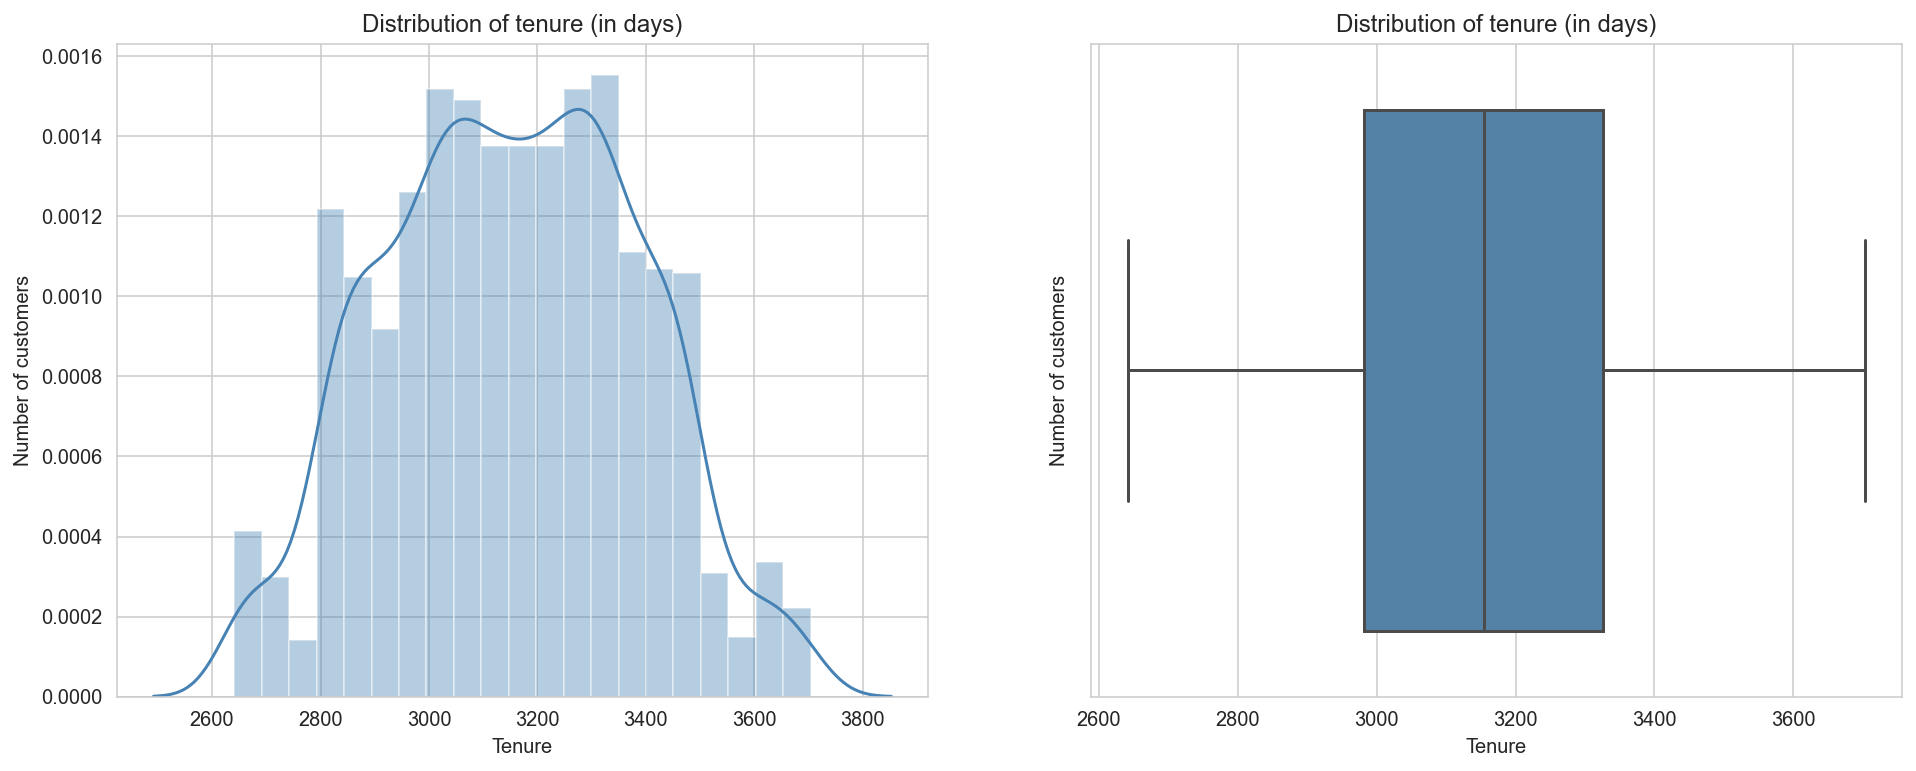

In [23]:
# create visualization for tenure_in_days
plot_charts('tenure_in_days', 'steelblue', 'Tenure', 'Distribution of tenure (in days)')

From the plot of the `tenure_in_days` above, there seems to be a slight binomial distribution though mainly normal distribution. The median value tends to be around 3100 to 3200 days, translating to 8.49 to 8.77 years, with no outliers.

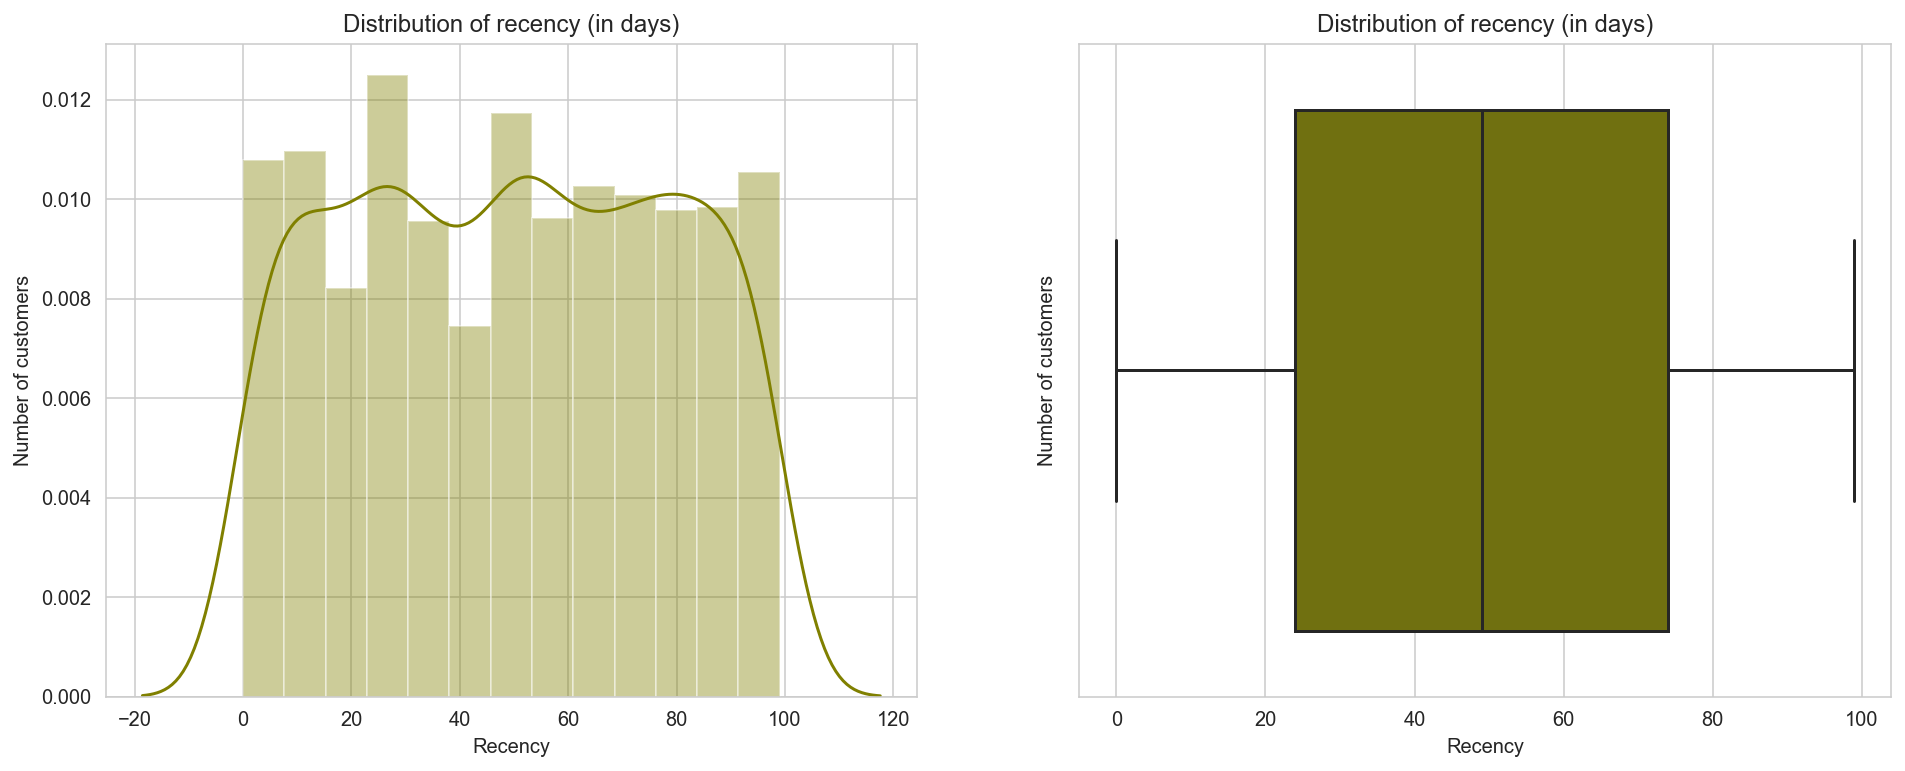

In [25]:
# create visualization for Recency
plot_charts('Recency', 'olive', 'Recency', 'Distribution of recency (in days)')

From the plot of the `Recency` above, there seems to be a slight multimodial distribution, though there are no outliers. The median value tends to be around 50 days, translating to 7.14 weeks.

Let's look at the customers' activity with the company, specifically the number of purchases made `total_num_purchases`, total amount of money spent `total_amt_spent` and number of visits to the web `NumWebVisitsMonth`.

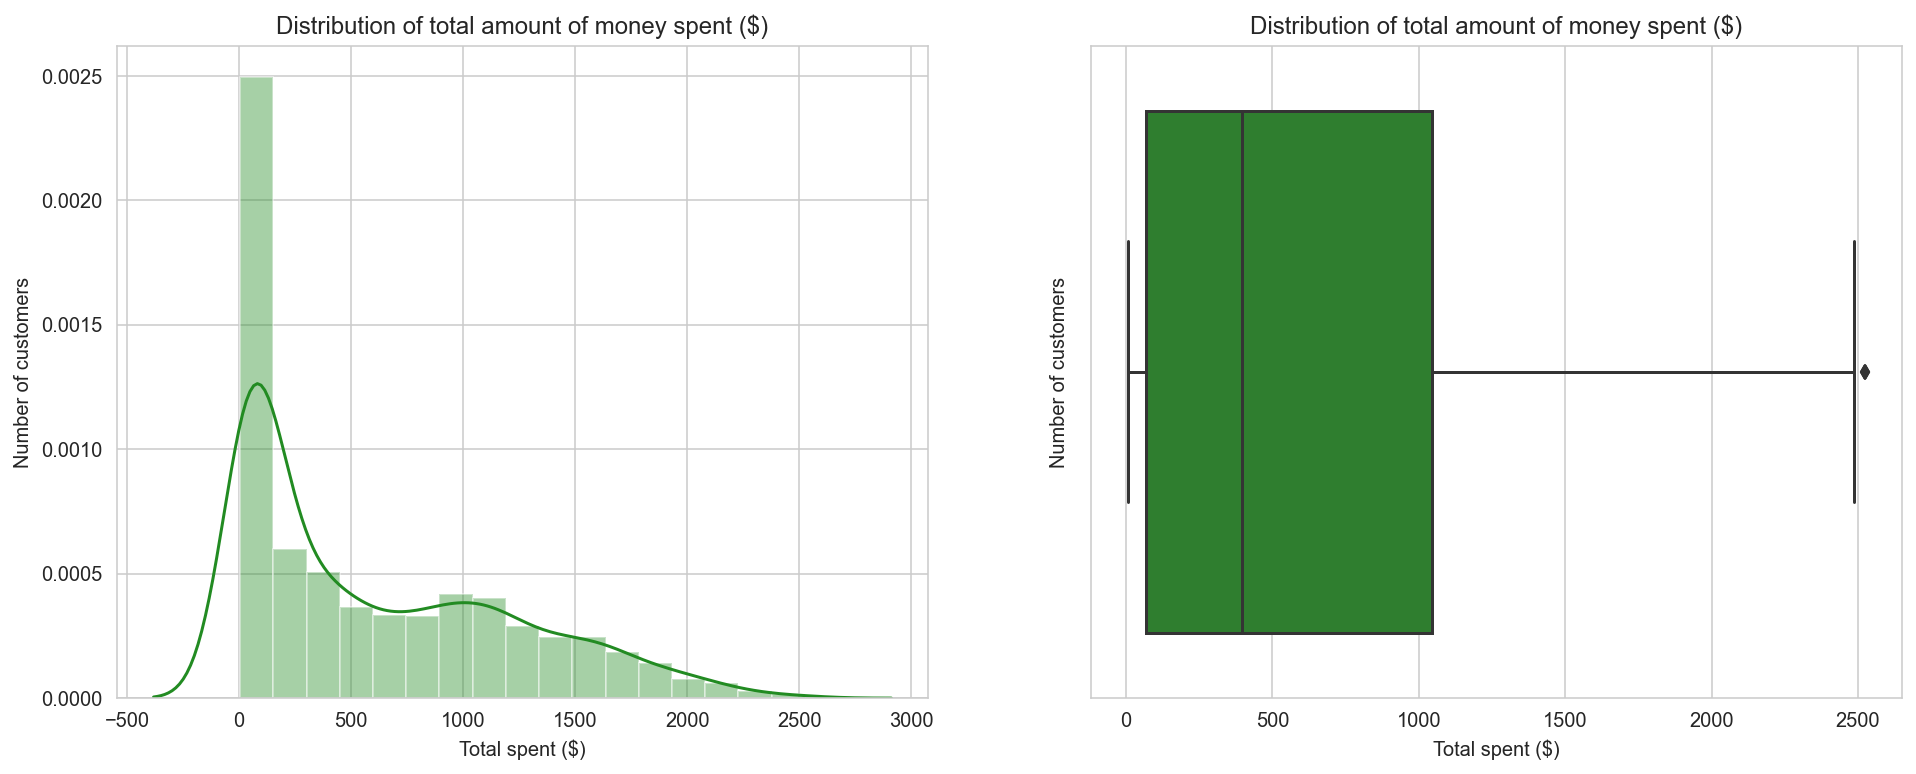

In [27]:
# create visualization for total_amt_spent
plot_charts('total_amt_spent', 'forestgreen', 'Total spent ($)', 'Distribution of total amount of money spent ($)')

From the plot of the `total_amt_spent` above, the distribution seems to be slightly right-skewed. The median value tends to be around 400 dollars, with outliers above 2500 dollars. 

In [28]:
# view outliers for total_amt_spent
customer_df[customer_df['total_amt_spent']>2500].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age_years,total_kids,total_amt_spent,total_num_purchases,tracking_end_date,tenure_in_days
1179,5735,1991,Master,Single,90638.0,0,0,2014-02-13,29,1156,120,915,94,144,96,1,3,4,10,1,0,0,1,0,0,0,3,11,0,31.0,0,2525,18,2022-02-28,2937
1492,1763,1988,Graduation,Together,87679.0,0,0,2013-07-27,62,1259,172,815,97,148,33,1,7,11,10,4,1,0,1,1,0,0,3,11,1,34.0,0,2524,29,2022-02-28,3138
1572,5350,1991,Master,Single,90638.0,0,0,2014-02-13,29,1156,120,915,94,144,96,1,3,4,10,1,0,0,1,0,0,0,3,11,1,31.0,0,2525,18,2022-02-28,2937


While it is likely for the total spends to exceed above 2500 dollars, we will imput the outliers with the median values.

In [29]:
# impute outliers with median total_amt_spent
customer_df['total_amt_spent'] = (customer_df['total_amt_spent']
                                  .mask(customer_df['total_amt_spent']>2500, np.median(customer_df['total_amt_spent'])))

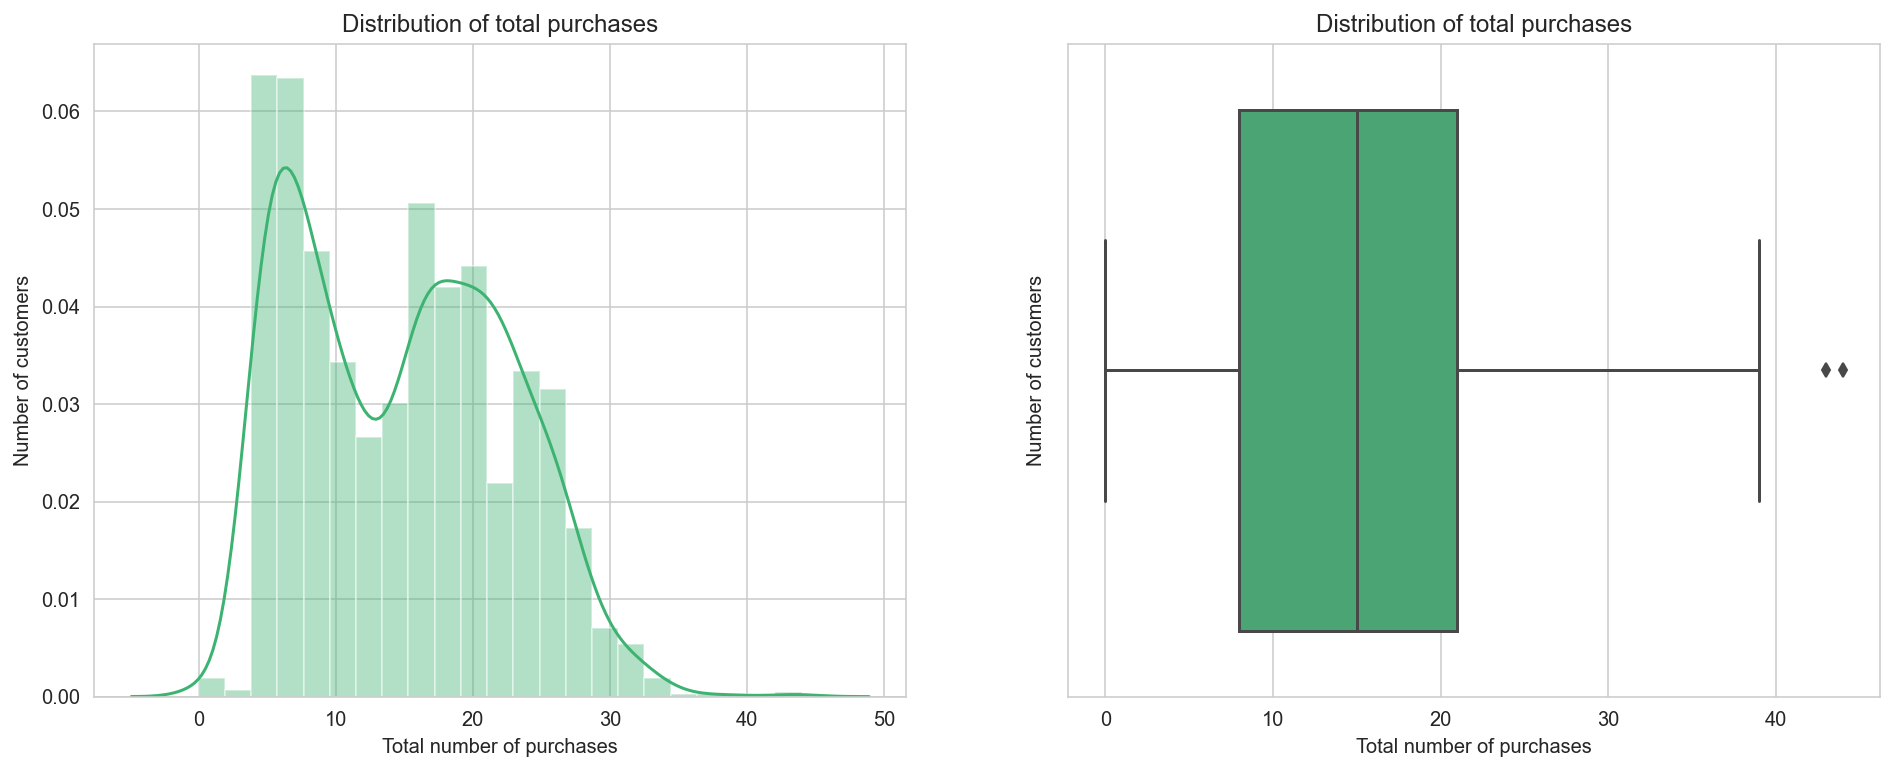

In [30]:
# create visualization for total_num_purchases
plot_charts('total_num_purchases', 'mediumseagreen', 'Total number of purchases', 'Distribution of total purchases')

From the plot of the `total_num_purchases` above, the distribution seems to be binomial. The median value tends to be around 15 purchases, with outliers above 40. 

In [31]:
# view outliers for total_num_purchases
customer_df[customer_df['total_num_purchases']>40].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age_years,total_kids,total_amt_spent,total_num_purchases,tracking_end_date,tenure_in_days
21,5376,1979,Graduation,Married,2447.0,1,0,2013-06-01,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0,43.0,1,1730.0,43,2022-02-28,3194
687,1501,1982,PhD,Married,51381.5,0,0,2012-04-08,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0,40.0,0,1717.0,44,2022-02-28,3613


While it is likely for the total number of purchases to exceed 40 purchases, we will impute the outliers with the median values.

In [32]:
# impute outliers with median total_num_purchases
customer_df['total_num_purchases'] = (customer_df['total_num_purchases']
                                      .mask(customer_df['total_num_purchases']>40, np.median(customer_df['total_num_purchases'])))

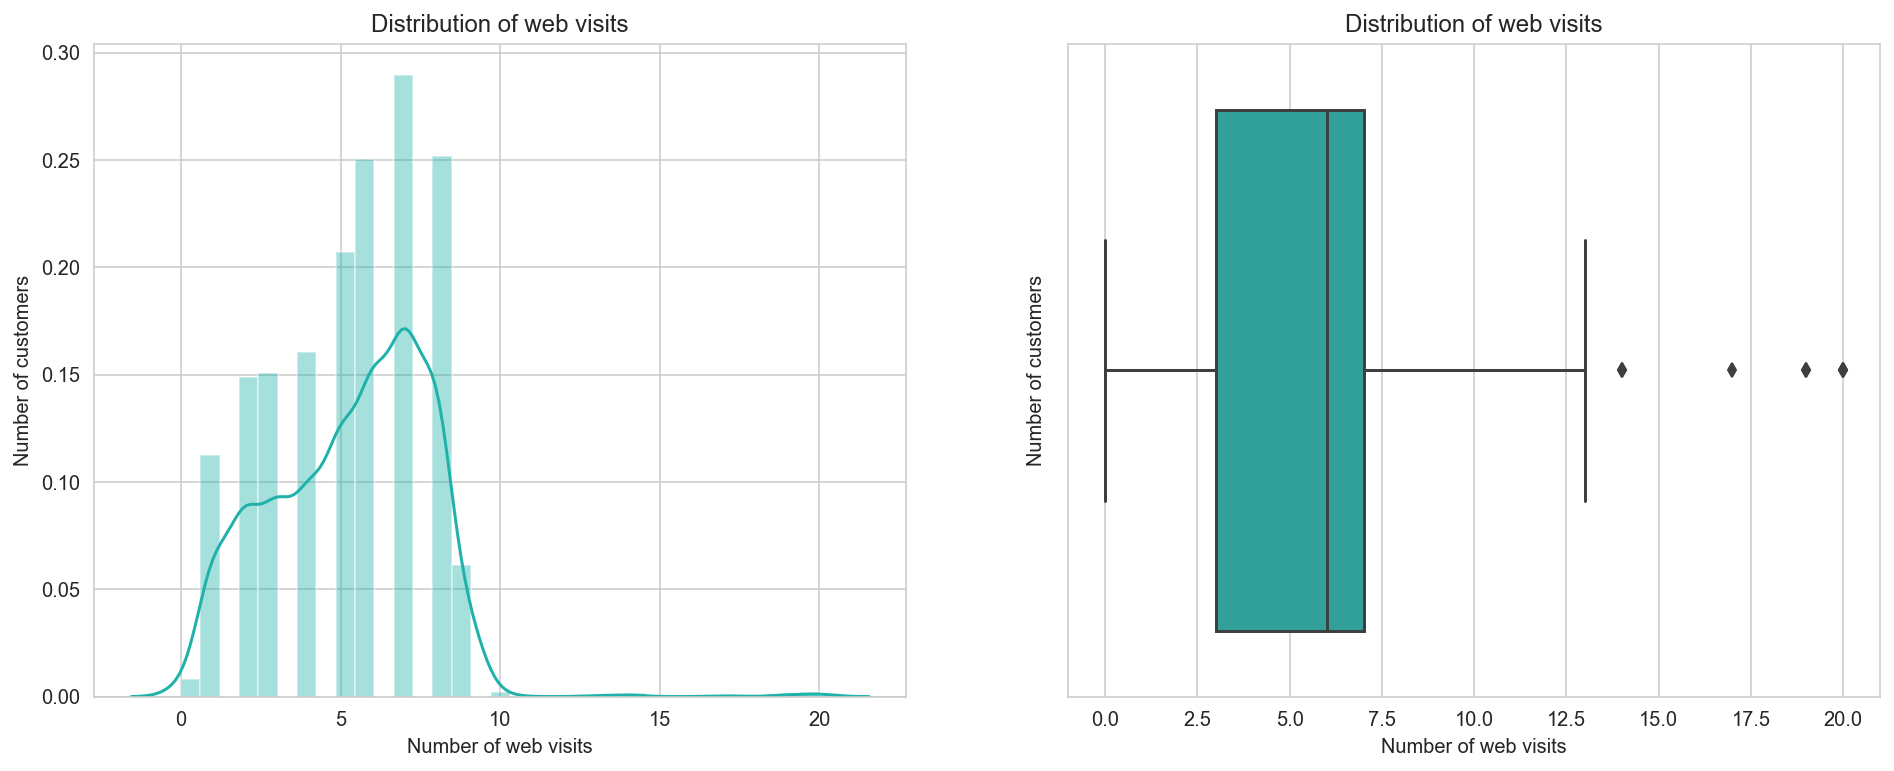

In [33]:
# create visualization for NumWebVisitsMonth
plot_charts('NumWebVisitsMonth', 'lightseagreen', 'Number of web visits', 'Distribution of web visits')

From the plot of the `NumWebVisitsMonth` above, the distribution seems to be close to normal distribution though slightly right-skewed. The median value tends to lie around 6 visits, with outliers above 12.5.

In [34]:
# view outliers for web visits
customer_df[customer_df['NumWebVisitsMonth']>12.5].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age_years,total_kids,total_amt_spent,total_num_purchases,tracking_end_date,tenure_in_days
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,72.0,2,49.0,2.0,2022-02-28,2909
774,4303,1957,PhD,Together,6835.0,0,1,2012-08-12,76,107,2,12,2,2,12,0,0,0,1,20,0,0,0,0,0,0,3,11,0,65.0,1,137.0,1.0,2022-02-28,3487
981,3955,1965,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,1,1,1,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,57.0,0,6.0,0.0,2022-02-28,2808
1042,10749,1991,Graduation,Single,8028.0,0,0,2012-09-18,62,73,18,66,7,12,2,15,0,1,0,19,0,0,0,0,0,0,3,11,0,31.0,0,178.0,16.0,2022-02-28,3450
1245,6862,1971,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,3,11,0,51.0,0,8.0,15.0,2022-02-28,2843


While it is likely for the total web visits per month to exceed 12.5, we will impute the outliers with the median values.

In [35]:
# impute outliers with median NumWebVisitsMonth
customer_df['NumWebVisitsMonth'] = (customer_df['NumWebVisitsMonth']
                                    .mask(customer_df['NumWebVisitsMonth']>12.5, np.median(customer_df['NumWebVisitsMonth'])))

While we have looked at the `total_amt_spent`, it will be interesting to understand which product has the highest expenditure. Let's look into `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts` and `MntGoldProds`.

[Text(0.5, 0, 'Amount spent ($)'), Text(0, 0.5, 'Number of customers')]

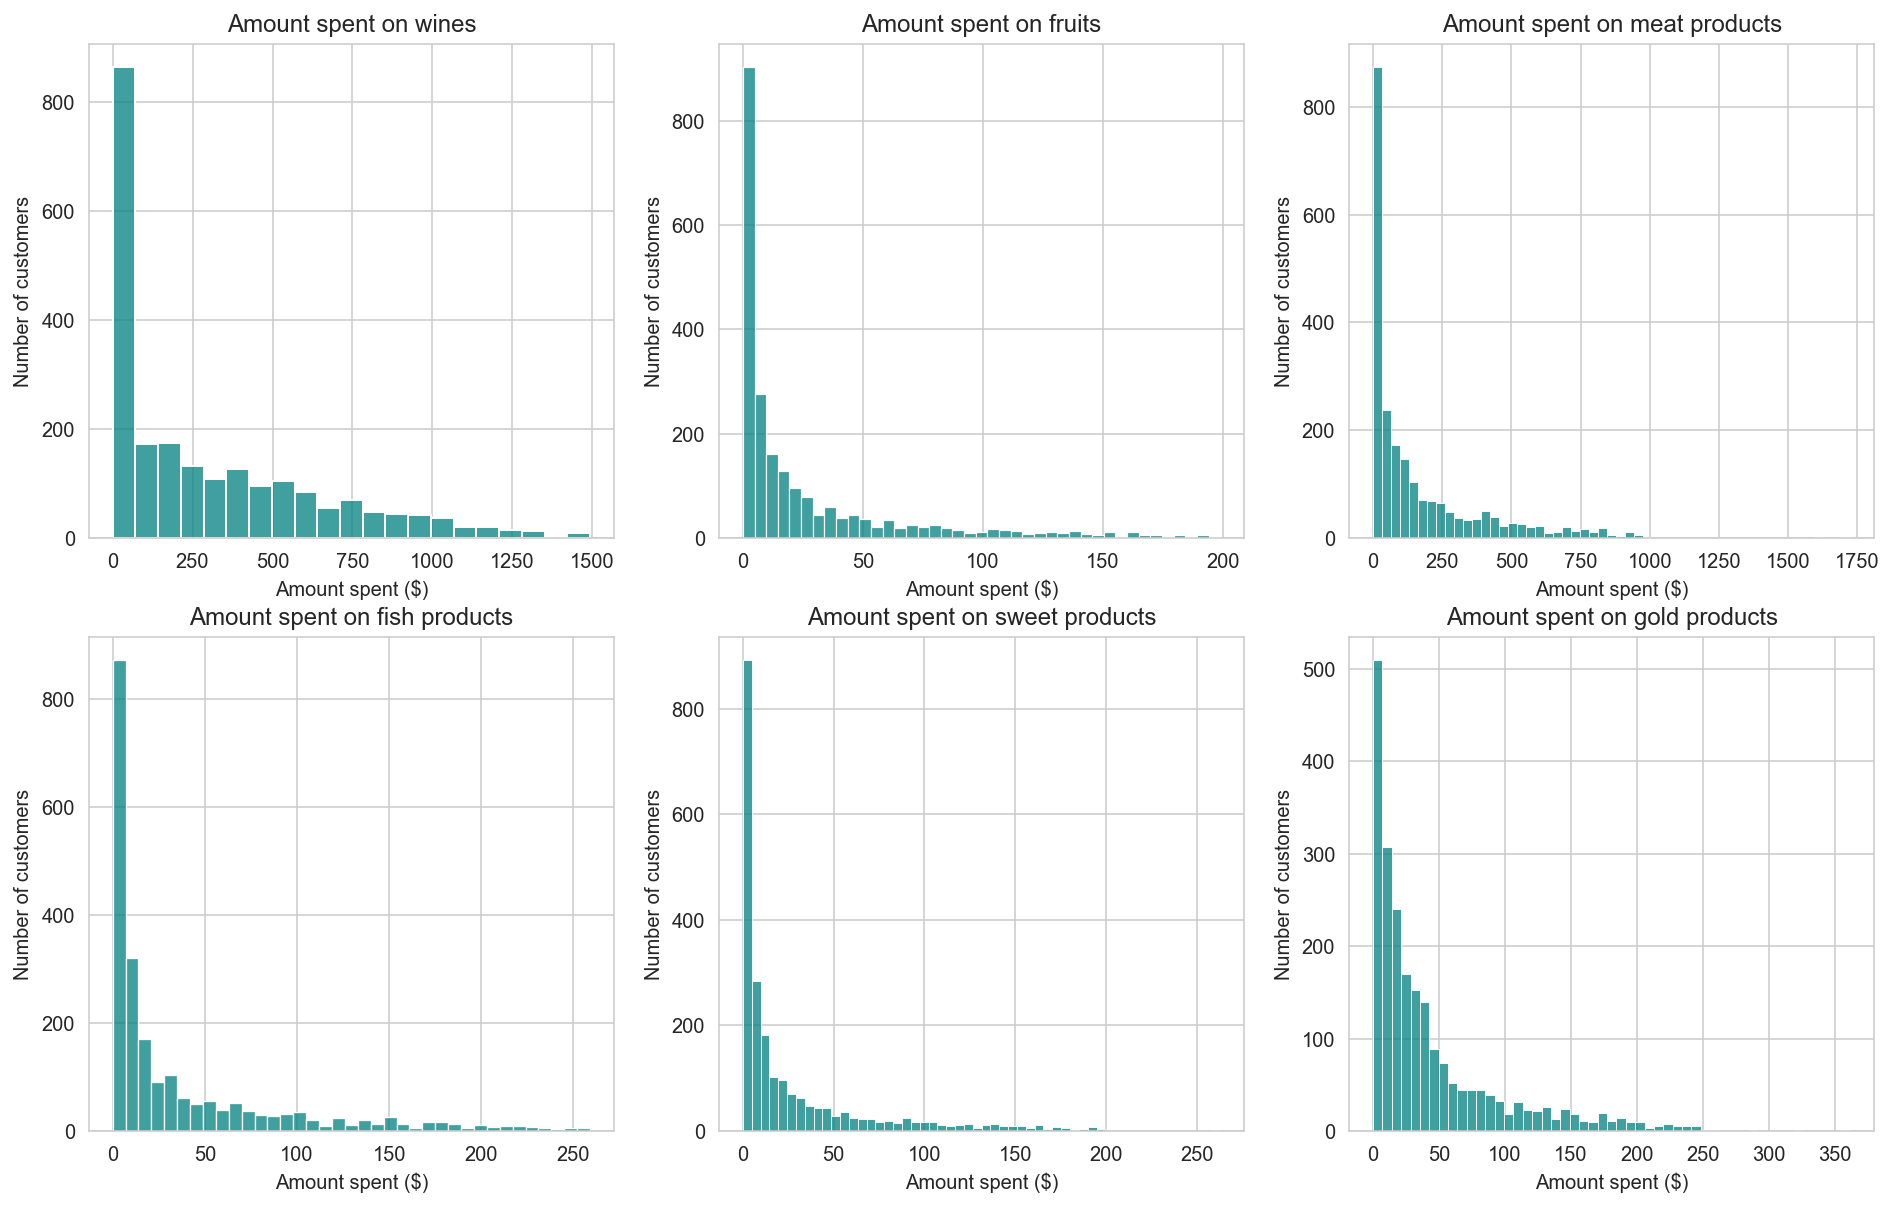

In [36]:
# create subplots for all 6 products
plt.figure(figsize=(16,10))

ax1 = plt.subplot(2,3,1)
ax1.set_title('Amount spent on wines')
ax1 = sns.histplot(customer_df['MntWines'], color='teal')
ax1.set(xlabel='Amount spent ($)', ylabel='Number of customers')
    
ax2 = plt.subplot(2,3,2)
ax2.set_title('Amount spent on fruits')
ax2 = sns.histplot(customer_df['MntFruits'], color='teal')
ax2.set(xlabel='Amount spent ($)', ylabel='Number of customers')

ax3 = plt.subplot(2,3,3)
ax3.set_title('Amount spent on meat products')
ax3 = sns.histplot(customer_df['MntMeatProducts'], color='teal')
ax3.set(xlabel='Amount spent ($)', ylabel='Number of customers')

ax4 = plt.subplot(2,3,4)
ax4.set_title('Amount spent on fish products')
ax4 = sns.histplot(customer_df['MntFishProducts'], color='teal')
ax4.set(xlabel='Amount spent ($)', ylabel='Number of customers')

ax5 = plt.subplot(2,3,5)
ax5.set_title('Amount spent on sweet products')
ax5 = sns.histplot(customer_df['MntSweetProducts'], color='teal')
ax5.set(xlabel='Amount spent ($)', ylabel='Number of customers')

ax6 = plt.subplot(2,3,6)
ax6.set_title('Amount spent on gold products')
ax6 = sns.histplot(customer_df['MntGoldProds'], color='teal')
ax6.set(xlabel='Amount spent ($)', ylabel='Number of customers')

It is interesting to note that meat products have the highest amount spent  – close to 1750 dollars – followed by wines.  


Let's look into the customers' responses to the six campaigns that have been introduced, `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`,  `AcceptedCmp5` and `Response`.

[Text(0.5, 0, 'Response'), Text(0, 0.5, 'Number of customers')]

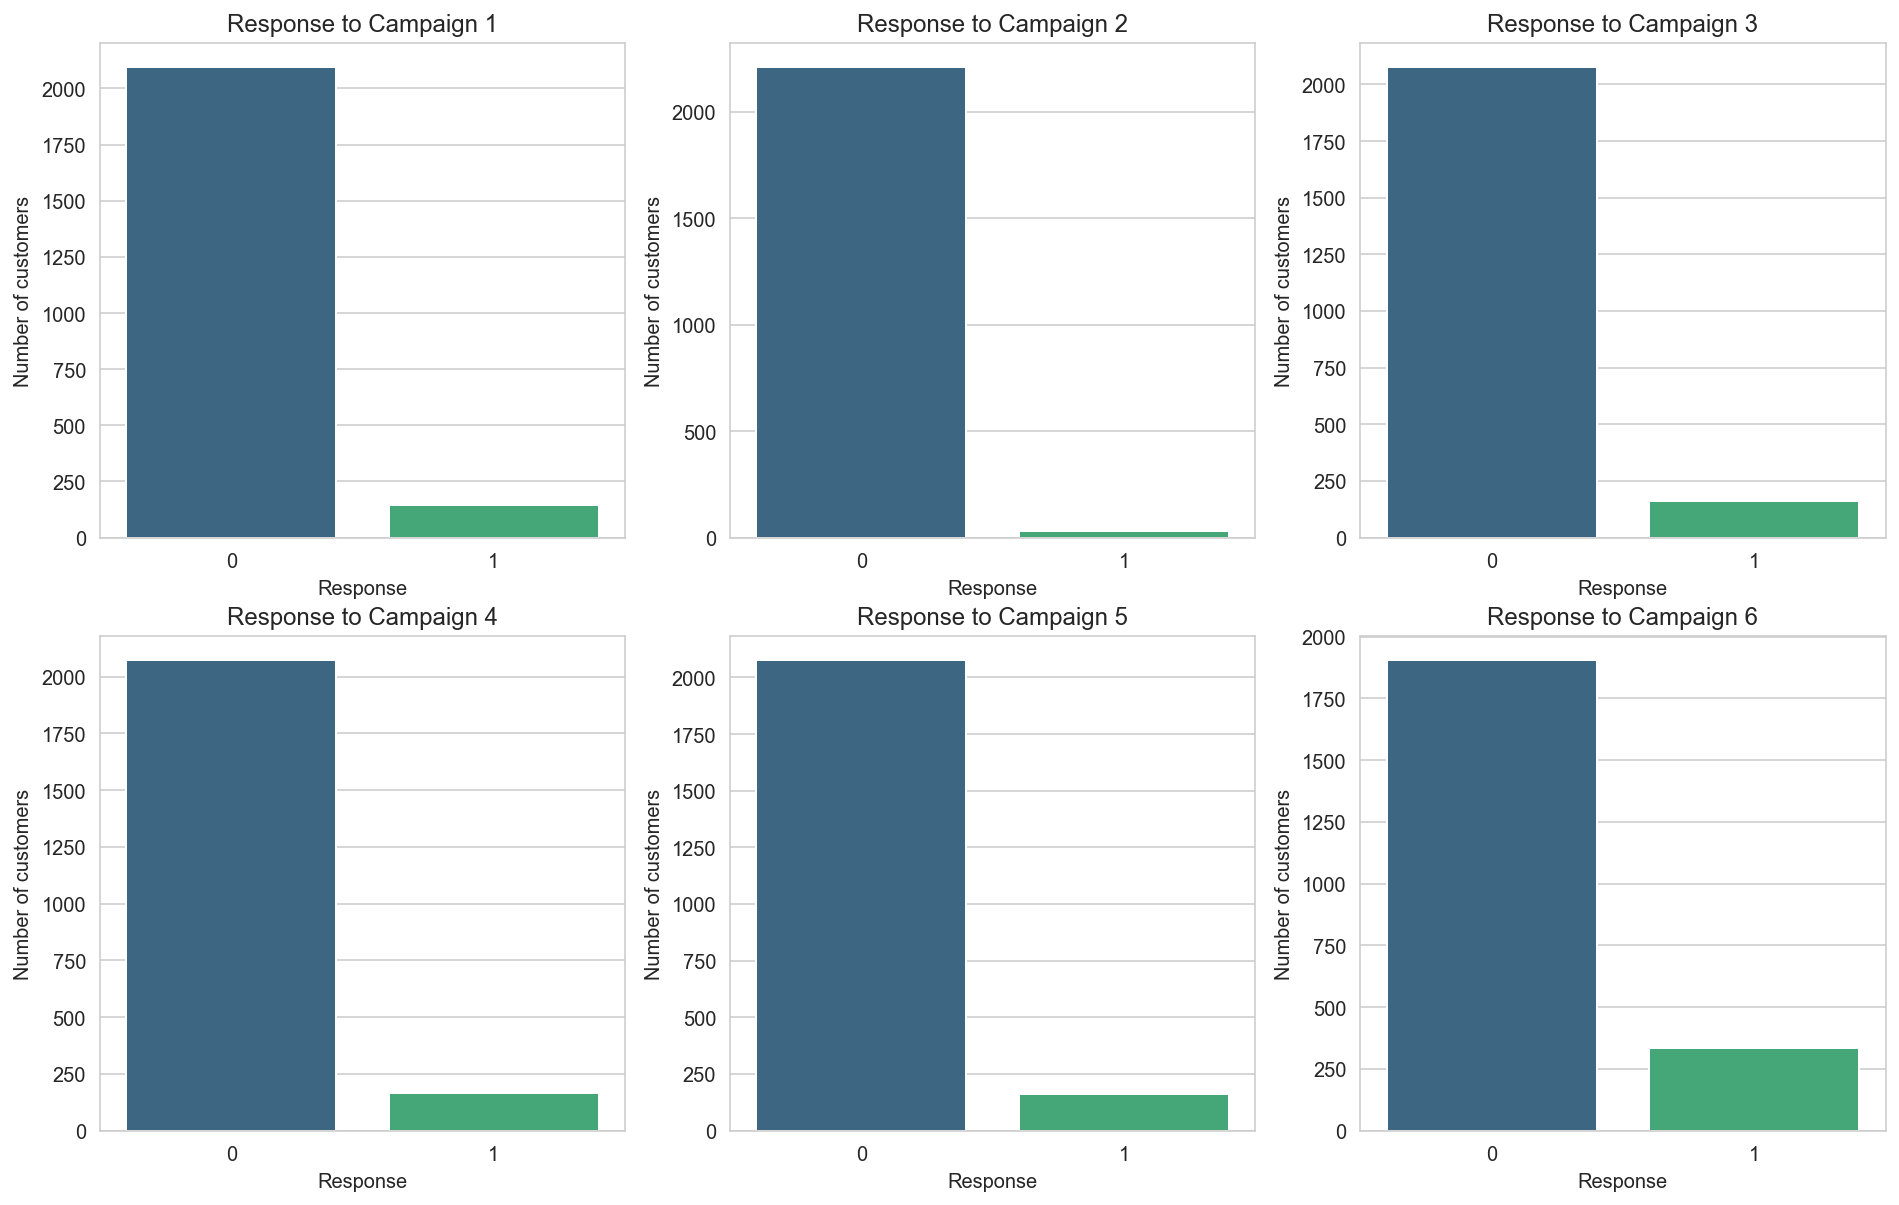

In [37]:
# create subplots for all 6 campaigns
plt.figure(figsize=(16,10))

ax1 = plt.subplot(2,3,1)
ax1.set_title('Response to Campaign 1')
ax1 = sns.countplot(x='AcceptedCmp1', data=customer_df, palette='viridis')
ax1.set(xlabel='Response', ylabel='Number of customers')

ax2 = plt.subplot(2,3,2)
ax2.set_title('Response to Campaign 2')
ax2 = sns.countplot(x='AcceptedCmp2', data=customer_df, palette='viridis')
ax2.set(xlabel='Response', ylabel='Number of customers')

ax3 = plt.subplot(2,3,3)
ax3.set_title('Response to Campaign 3')
ax3 = sns.countplot(x='AcceptedCmp3', data=customer_df, palette='viridis')
ax3.set(xlabel='Response', ylabel='Number of customers')

ax4 = plt.subplot(2,3,4)
ax4.set_title('Response to Campaign 4')
ax4 = sns.countplot(x='AcceptedCmp4', data=customer_df, palette='viridis')
ax4.set(xlabel='Response', ylabel='Number of customers')

ax5 = plt.subplot(2,3,5)
ax5.set_title('Response to Campaign 5')
ax5 = sns.countplot(x='AcceptedCmp5', data=customer_df, palette='viridis')
ax5.set(xlabel='Response', ylabel='Number of customers')

ax6 = plt.subplot(2,3,6)
ax6.set_title('Response to Campaign 6')
ax6 = sns.countplot(x='Response', data=customer_df, palette='viridis')
ax6.set(xlabel='Response', ylabel='Number of customers')

It seems that across all six campaigns, most customers have yet to respond to the campaigns. The highest number of positive responses (1) is stemming from Campaign 6, represented by `Response`.

Let's look into the last three features – `Complain`, `Z_CostContact` and `Z_Revenue`.

[Text(0.5, 0, 'Revenue'), Text(0, 0.5, 'Number of customers')]

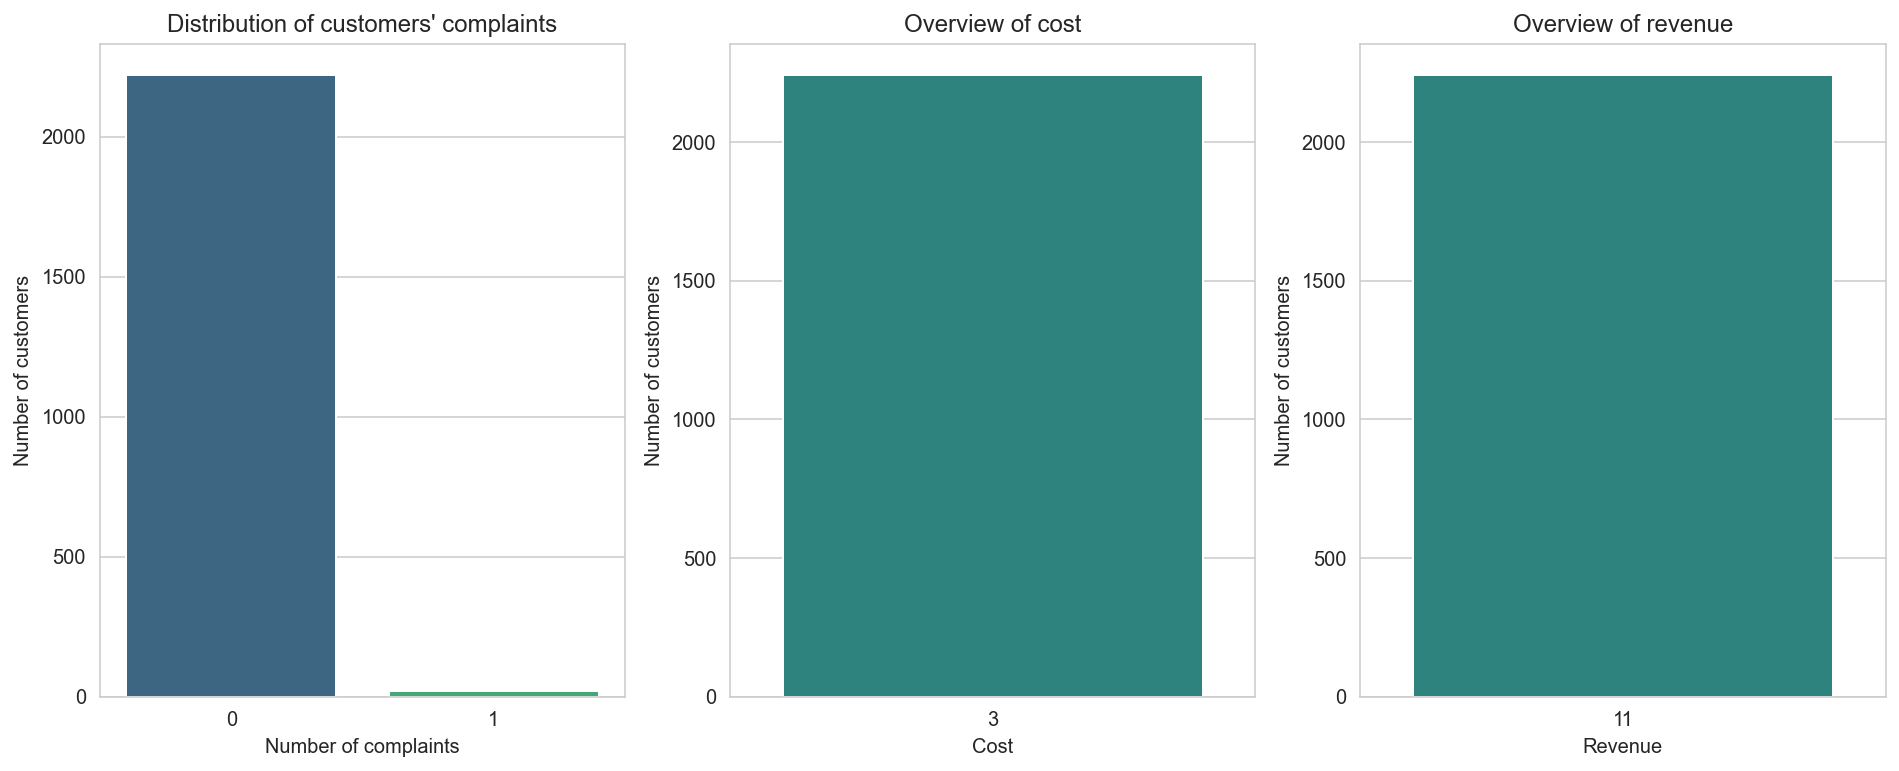

In [38]:
# create subplots for Complain, CostContact and Revenue
plt.figure(figsize=(16,6))

ax1 = plt.subplot(1,3,1)
ax1.set_title("Distribution of customers' complaints")
ax1 = sns.countplot(x='Complain', data=customer_df, palette='viridis')
ax1.set(xlabel='Number of complaints', ylabel='Number of customers')

ax2 = plt.subplot(1,3,2)
ax2.set_title('Overview of cost')
ax2 = sns.countplot(x='Z_CostContact', data=customer_df, palette='viridis')
ax2.set(xlabel='Cost', ylabel='Number of customers')

ax3 = plt.subplot(1,3,3)
ax3.set_title('Overview of revenue')
ax3 = sns.countplot(x='Z_Revenue', data=customer_df, palette='viridis')
ax3.set(xlabel='Revenue', ylabel='Number of customers')

From the number of complaints, it can be observed that generally most customers do not lodge complaints.
As for the charts featuring `Z_CostContact` and `Z_Revenue`, only one value seems to exist in both features, which may deem the columns unnecessary.

### 5. Feature Engineering & Pre-processing

Having completed a further EDA, we will look into preprocessing the DataFrame further, as well as engineering new features that can be utilised. This includes:
- `Education` – Postgrad vs Undergrad
- `Marital_Status` – Alone vs Couple

In [39]:
# create new mapping for Education
customer_df['education_level'] = customer_df['Education'].map({'Graduation':'Postgrad',
                                                               'PhD':'Postgrad',
                                                               'Master':'Postgrad', 
                                                               '2n Cycle': 'Undergrad', 
                                                               'Basic': 'Undergrad'})

# create new mapping for Marital_Status
customer_df['living_status'] = customer_df['Marital_Status'].map({'Married':'Couple',
                                                                  'Together':'Couple',
                                                                  'Single':'Alone', 
                                                                  'Divorced':'Alone', 
                                                                  'Widow':'Alone', 
                                                                  'Alone': 'Alone',
                                                                  'Absurd':'Alone',
                                                                  'YOLO':'Alone'})

We will also create new features to indicate whether the customer has kids from `total_kids` and the number of members in the family.

In [40]:
# create new column for having children
customer_df['has_kids'] = np.where(customer_df['total_kids']>0, 1, 0)

# create new column for total number of members in the family
customer_df['family_size'] = customer_df['total_kids'] + customer_df['living_status'].replace({'Alone':1, 'Couple':2})

In [41]:
# create a copy of the DataFrame
customer_new_df = customer_df.copy()

# assign unnecessary features to a variable to be dropped
features_to_drop = ['Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer',
                    'Z_CostContact', 'Z_Revenue', 'tracking_end_date']

# drop unnecessary features
customer_new_df = customer_new_df.drop(features_to_drop, axis=1)

In [42]:
# view top 5 rows
customer_new_df.head()

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age_years,total_kids,total_amt_spent,total_num_purchases,tenure_in_days,education_level,living_status,has_kids,family_size
0,5524,58138.0,58,635,88,546,172,88,88,3,8,10,4,7.0,0,0,0,0,0,0,1,65.0,0,1617.0,25.0,3612,Postgrad,Alone,0,1
1,2174,46344.0,38,11,1,6,2,1,6,2,1,1,2,5.0,0,0,0,0,0,0,0,68.0,2,27.0,6.0,2766,Postgrad,Alone,1,3
2,4141,71613.0,26,426,49,127,111,21,42,1,8,2,10,4.0,0,0,0,0,0,0,0,57.0,0,776.0,21.0,3113,Postgrad,Couple,0,2
3,6182,26646.0,26,11,4,20,10,3,5,2,2,0,4,6.0,0,0,0,0,0,0,0,38.0,1,53.0,8.0,2706,Postgrad,Couple,1,3
4,5324,58293.0,94,173,43,118,46,27,15,5,5,3,6,5.0,0,0,0,0,0,0,0,41.0,1,422.0,19.0,2962,Postgrad,Couple,1,3


<AxesSubplot:>

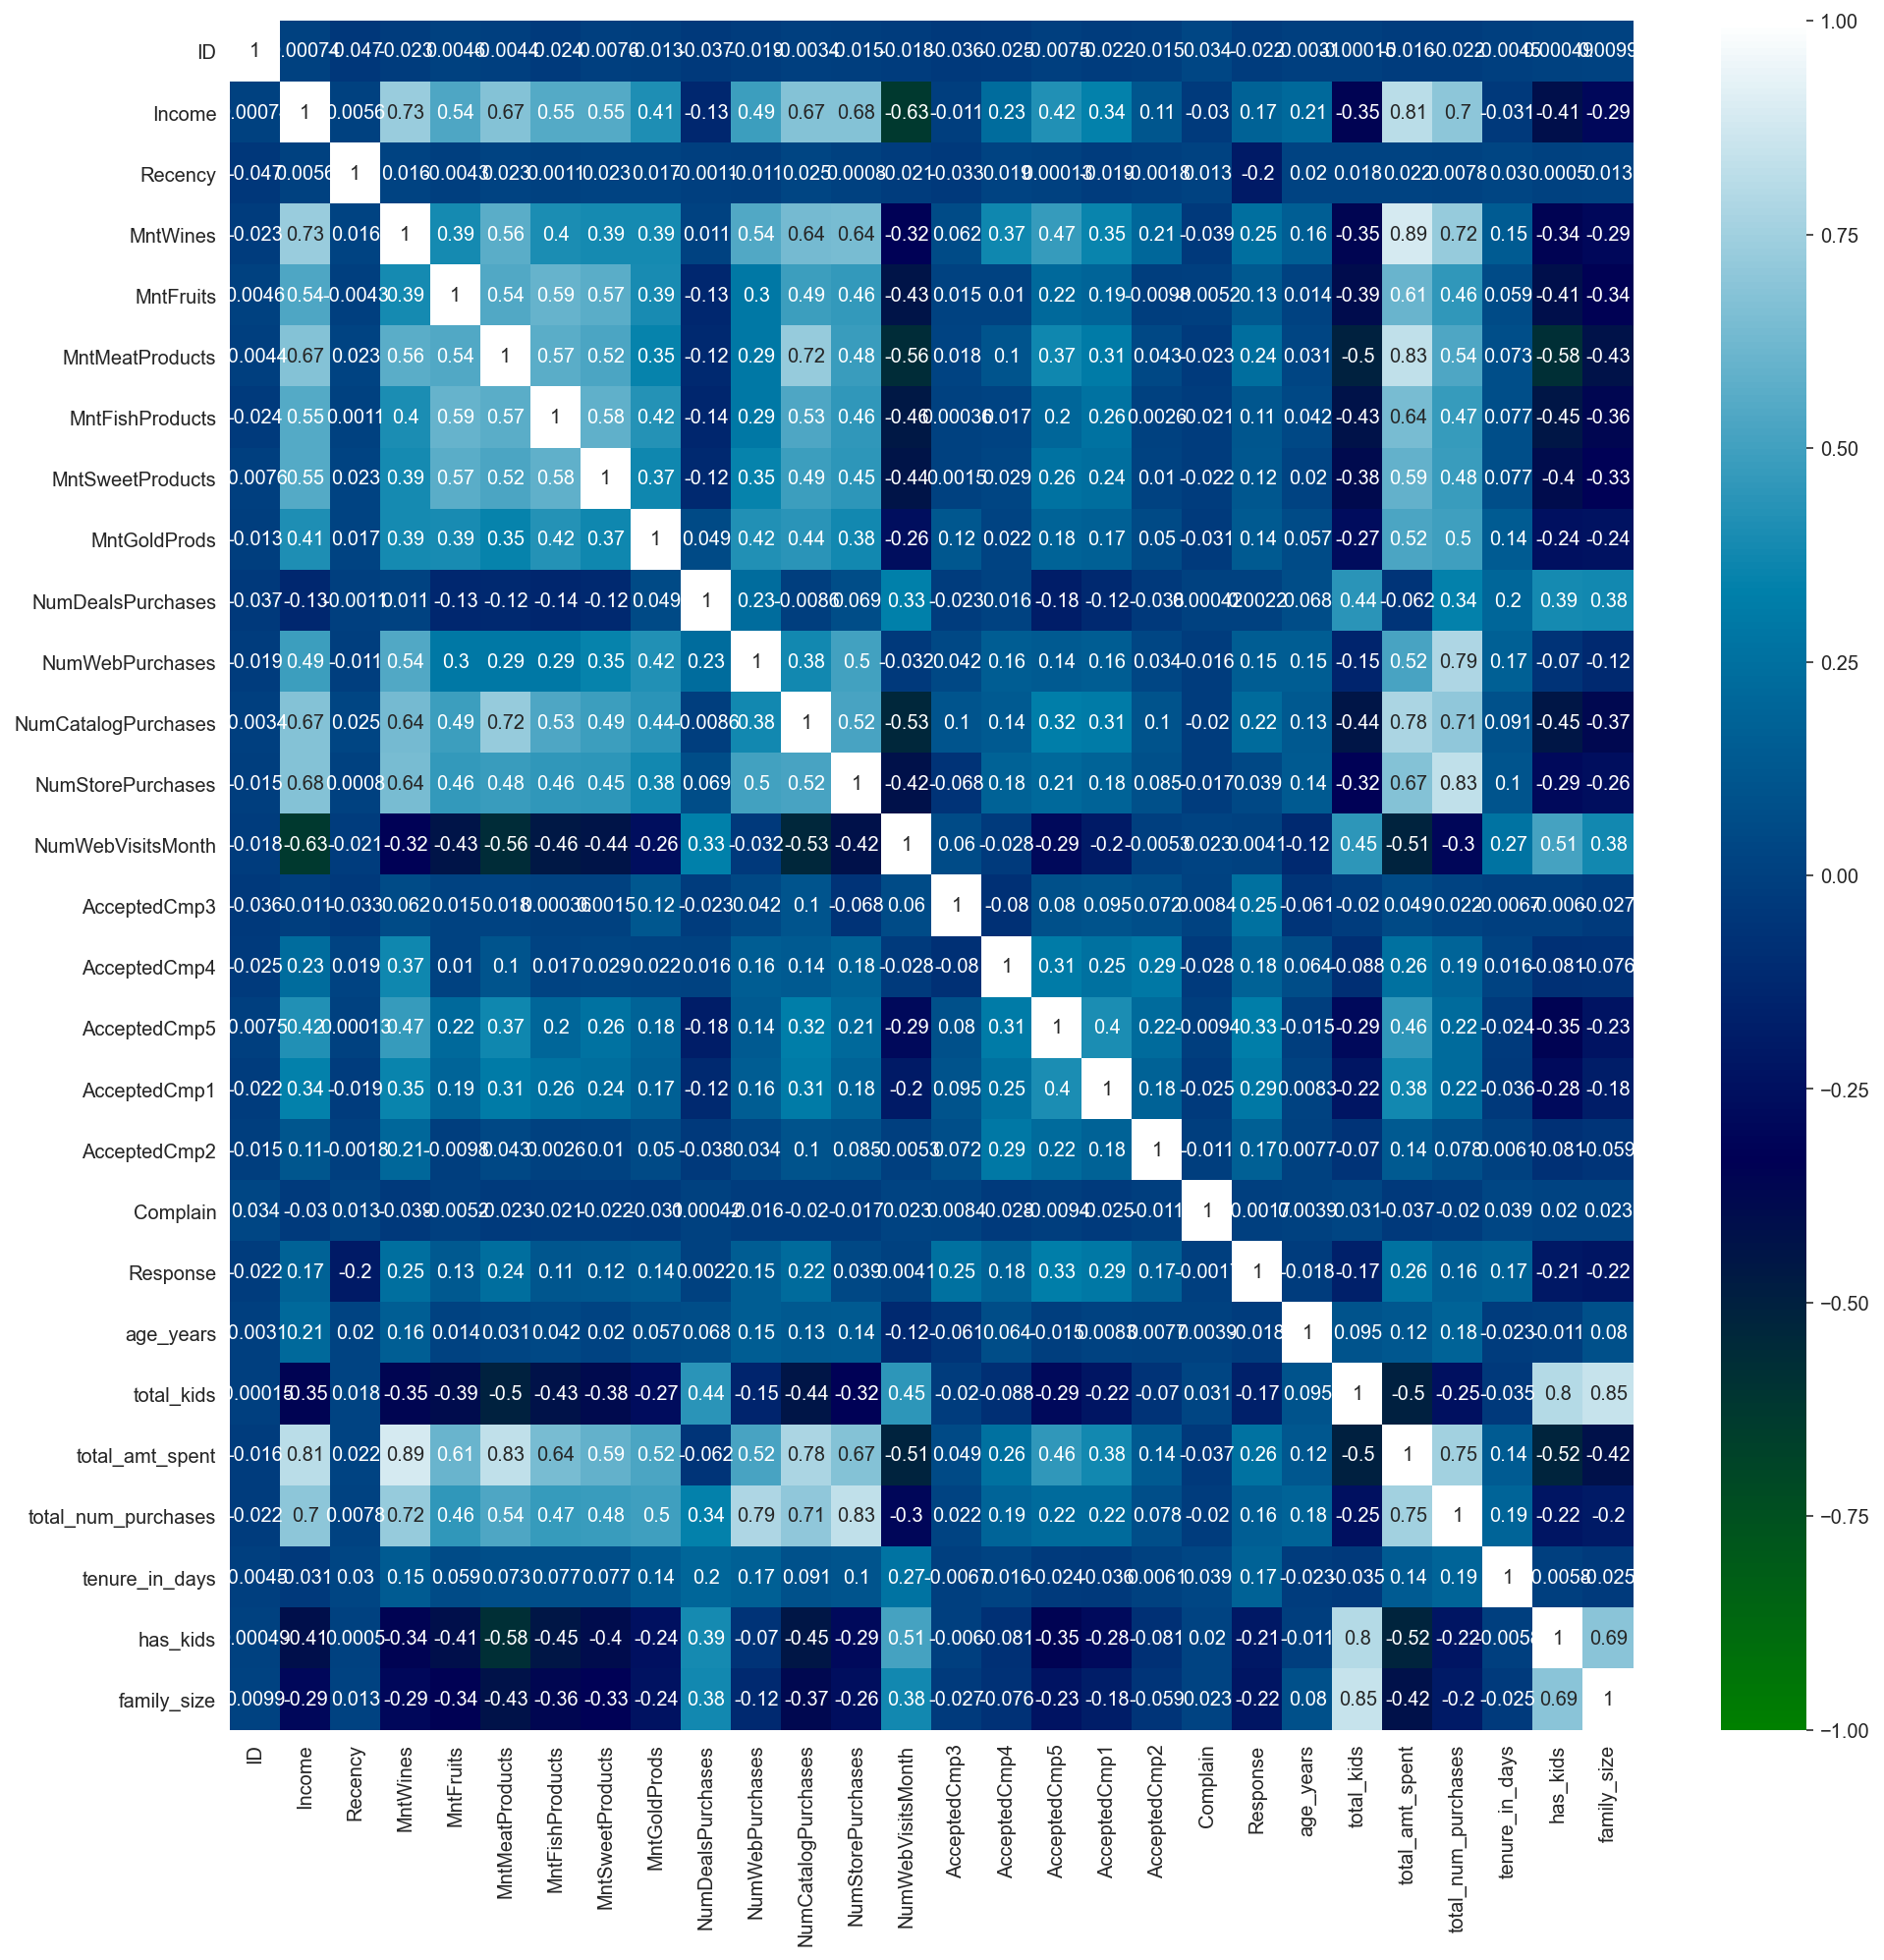

In [43]:
# plot heatmap
plt.figure(figsize=(16,16))
sns.heatmap(customer_new_df.corr(), annot=True, vmin=-1, vmax=1, cmap='ocean')

From the above heatmap, it is interesting to note that: 
- `NumWebVisitsMonth` has negative correlation with most variables.
- `total_amt_spent` seems to correlate most positively with `MntWines` and `MntMeatProducts`, suggesting that customers do spend more on wines and meat products. 
    - On the other hand, it correlates most negatively with `has_kids` and `NumWebVisitsMonth`, indicating that customers with more kids may not necessary spend more on purchases, and higher web visits may not translate to higher spending amount. 
- `total_num_purchases` seems to correlate most positively with `NumStorePurchases` and `NumWebPurchases`, suggesting that more customers may have carried out their transactions either in the physical stores or through the online website. 
- The various campaign performances have some correlation with the purchases – instead of dropping them, we can keep them to undersand how they have contributed to the purchases by customers. 

Let's transform the categorical variables with the help of Label Encoder.

In [44]:
# identify all categorical variables
obj_var = customer_new_df.dtypes == 'object'
obj_list = list(obj_var[obj_var].index)
print(f'The categorical variables present in the dataset are: {obj_list}.')

The categorical variables present in the dataset are: ['education_level', 'living_status'].


In [45]:
# apply label encoder to transform the categorical variables
le = LabelEncoder()
for i in obj_list:
    customer_new_df[i] = customer_new_df[[i]].apply(le.fit_transform)

In [46]:
# create a copy of the DataFrame to retain ID for mapping
customer_copy_df = customer_new_df.copy()

# drop ID
customer_copy_df = customer_copy_df.drop(columns='ID')

# view top 5 rows
customer_copy_df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age_years,total_kids,total_amt_spent,total_num_purchases,tenure_in_days,education_level,living_status,has_kids,family_size
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7.0,0,0,0,0,0,0,1,65.0,0,1617.0,25.0,3612,0,0,0,1
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5.0,0,0,0,0,0,0,0,68.0,2,27.0,6.0,2766,0,0,1,3
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4.0,0,0,0,0,0,0,0,57.0,0,776.0,21.0,3113,0,1,0,2
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6.0,0,0,0,0,0,0,0,38.0,1,53.0,8.0,2706,0,1,1,3
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5.0,0,0,0,0,0,0,0,41.0,1,422.0,19.0,2962,0,1,1,3


In [47]:
# view the data types
customer_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2240 non-null   float64
 1   Recency              2240 non-null   int64  
 2   MntWines             2240 non-null   int64  
 3   MntFruits            2240 non-null   int64  
 4   MntMeatProducts      2240 non-null   int64  
 5   MntFishProducts      2240 non-null   int64  
 6   MntSweetProducts     2240 non-null   int64  
 7   MntGoldProds         2240 non-null   int64  
 8   NumDealsPurchases    2240 non-null   int64  
 9   NumWebPurchases      2240 non-null   int64  
 10  NumCatalogPurchases  2240 non-null   int64  
 11  NumStorePurchases    2240 non-null   int64  
 12  NumWebVisitsMonth    2240 non-null   float64
 13  AcceptedCmp3         2240 non-null   int64  
 14  AcceptedCmp4         2240 non-null   int64  
 15  AcceptedCmp5         2240 non-null   i

In [48]:
# save the dataset
customer_copy_df.to_csv('../datasets/customer_cleaned.csv', index=False)

In the next notebook, we will look into grouping the customers into various segments, based on their demographics and transactions history. 